In [1]:
#Step 1: IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
sns.set()

In [2]:
#Step 2a: IMPORTING & ANALYSING DATA
aide_alimentaire = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 4\aide_alimentaire.csv")

In [3]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [4]:
#Step 2b: IMPORTING & ANALYSING DATA
dispo_alimentaire = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 4\dispo_alimentaire.csv")

In [5]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,nan,nan,5.00,1.72,0.20,0.77,53.00,nan,nan,53.00,nan,53.00,nan,nan,nan
1,Afghanistan,"Agrumes, Autres",vegetale,nan,nan,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,nan,nan,nan
2,Afghanistan,Aliments pour enfants,vegetale,nan,nan,1.00,0.06,0.01,0.03,2.00,nan,2.00,2.00,nan,nan,nan,nan,nan
3,Afghanistan,Ananas,vegetale,nan,nan,0.00,0.00,nan,nan,0.00,nan,0.00,0.00,nan,nan,nan,nan,nan
4,Afghanistan,Bananes,vegetale,nan,nan,4.00,2.70,0.02,0.05,82.00,nan,82.00,82.00,nan,nan,nan,nan,nan


In [6]:
#Step 2c: IMPORTING & ANALYSING DATA
population = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 4\population.csv")

In [7]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,"32,269.59"
1,Afghanistan,2014,"33,370.79"
2,Afghanistan,2015,"34,413.60"
3,Afghanistan,2016,"35,383.03"
4,Afghanistan,2017,"36,296.11"


In [8]:
#Step 2d: IMPORTING & ANALYSING DATA
sous_nutrition = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 4\sous_nutrition.csv")

In [9]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [10]:
sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition.Valeur, errors='coerce')

In [11]:
###Question 1: la proportion de personnes en état de sous-nutrition (en million)

In [12]:
x = sous_nutrition.loc[sous_nutrition['Année'] == "2016-2018", 'Valeur'].sum()
y = population.loc[population['Année'] == 2017, 'Valeur'].sum()
z = y/1000
result = round((x/z)*100, 3)
print(result, "Pourcent")

7.097 Pourcent


In [13]:
###Question 2: le nombre théorique de personnes qui pourraient être nourries (2013)

In [14]:
DA2013 = dispo_alimentaire.groupby(['Zone'])[['Disponibilité alimentaire (Kcal/personne/jour)']].sum()
print(DA2013)

                       Disponibilité alimentaire (Kcal/personne/jour)
Zone                                                                 
Afghanistan                                                  2,087.00
Afrique du Sud                                               3,020.00
Albanie                                                      3,188.00
Algérie                                                      3,293.00
Allemagne                                                    3,503.00
...                                                               ...
Émirats arabes unis                                          3,275.00
Équateur                                                     2,346.00
États-Unis d'Amérique                                        3,682.00
Éthiopie                                                     2,129.00
Îles Salomon                                                 2,383.00

[174 rows x 1 columns]


In [15]:
POP2013 = population.loc[population['Année'] == 2013]
POP2013['Valeur'] = (POP2013['Valeur'] * 1000)
print(POP2013)

                                        Zone  Année        Valeur
0                                Afghanistan   2013 32,269,589.00
6                             Afrique du Sud   2013 53,687,121.00
12                                   Albanie   2013  2,903,790.00
18                                   Algérie   2013 38,140,133.00
24                                 Allemagne   2013 81,174,367.00
...                                      ...    ...           ...
1386  Venezuela (République bolivarienne du)   2013 29,781,040.00
1392                                Viet Nam   2013 90,752,592.00
1398                                   Yémen   2013 25,147,109.00
1404                                  Zambie   2013 14,926,544.00
1410                                Zimbabwe   2013 13,350,373.00

[236 rows x 3 columns]


C:\Users\caspe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
DAPOP2013 = DA2013.merge(POP2013, on='Zone', how='left')
print(DAPOP2013)

                      Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0              Afghanistan                                        2,087.00   
1           Afrique du Sud                                        3,020.00   
2                  Albanie                                        3,188.00   
3                  Algérie                                        3,293.00   
4                Allemagne                                        3,503.00   
..                     ...                                             ...   
169    Émirats arabes unis                                        3,275.00   
170               Équateur                                        2,346.00   
171  États-Unis d'Amérique                                        3,682.00   
172               Éthiopie                                        2,129.00   
173           Îles Salomon                                        2,383.00   

       Année         Valeur  
0   2,013.00  32,269,589.00  
1  

In [17]:
DAPOP2013["DispoAlimTotal"] = (DAPOP2013["Disponibilité alimentaire (Kcal/personne/jour)"] * DAPOP2013["Valeur"])
DA_SUM = DAPOP2013["DispoAlimTotal"].sum()
### Selon le WHO une personne a besoin de 2100 KCal par jour
Disp_Alim_Theor = round((DA_SUM/2100), 2)
print(Disp_Alim_Theor, "nombre théorique de personnes qui pourraient être nourries (2013)")

9544934822.81 nombre théorique de personnes qui pourraient être nourries (2013)


In [18]:
###methode 2

In [19]:
DA2POP2013 = dispo_alimentaire.merge(POP2013, on='Zone', how='left')
DA2POP2013[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Valeur']]
DA2_SUM = ((DA2POP2013['Disponibilité alimentaire (Kcal/personne/jour)'] * DA2POP2013['Valeur']).sum())
### Selon le WHO une personne a besoin de 2100 KCal par jour
Disp_Alim_Theor = round((DA2_SUM/2100), 2)
print(Disp_Alim_Theor, "nombre théorique de personnes qui pourraient être nourries (2013)")

9544934822.81 nombre théorique de personnes qui pourraient être nourries (2013)


In [20]:
###Question 3: le nombre théorique de personnes qui pourraient être nourries, produits végétaux (2013)

In [21]:
DAV2013 = dispo_alimentaire.groupby(by=['Zone','Origine'])[['Disponibilité alimentaire (Kcal/personne/jour)']].sum().\
reset_index()
indexNames = DAV2013[DAV2013['Origine'] == "animale" ].index
DAV2013.drop(indexNames , inplace=True)
print(DAV2013)

                      Zone   Origine  \
1              Afghanistan  vegetale   
3           Afrique du Sud  vegetale   
5                  Albanie  vegetale   
7                  Algérie  vegetale   
9                Allemagne  vegetale   
..                     ...       ...   
339    Émirats arabes unis  vegetale   
341               Équateur  vegetale   
343  États-Unis d'Amérique  vegetale   
345               Éthiopie  vegetale   
347           Îles Salomon  vegetale   

     Disponibilité alimentaire (Kcal/personne/jour)  
1                                          1,871.00  
3                                          2,533.00  
5                                          2,203.00  
7                                          2,915.00  
9                                          2,461.00  
..                                              ...  
339                                        2,718.00  
341                                        1,732.00  
343                              

In [22]:
POP2013 = population.loc[population['Année'] == 2013]
POP2013['Valeur'] = (POP2013['Valeur'] * 1000)
print(POP2013)

                                        Zone  Année        Valeur
0                                Afghanistan   2013 32,269,589.00
6                             Afrique du Sud   2013 53,687,121.00
12                                   Albanie   2013  2,903,790.00
18                                   Algérie   2013 38,140,133.00
24                                 Allemagne   2013 81,174,367.00
...                                      ...    ...           ...
1386  Venezuela (République bolivarienne du)   2013 29,781,040.00
1392                                Viet Nam   2013 90,752,592.00
1398                                   Yémen   2013 25,147,109.00
1404                                  Zambie   2013 14,926,544.00
1410                                Zimbabwe   2013 13,350,373.00

[236 rows x 3 columns]


C:\Users\caspe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
DAVPOP2013 = DAV2013.merge(POP2013, on='Zone', how='left')
print(DAVPOP2013)

                      Zone   Origine  \
0              Afghanistan  vegetale   
1           Afrique du Sud  vegetale   
2                  Albanie  vegetale   
3                  Algérie  vegetale   
4                Allemagne  vegetale   
..                     ...       ...   
169    Émirats arabes unis  vegetale   
170               Équateur  vegetale   
171  États-Unis d'Amérique  vegetale   
172               Éthiopie  vegetale   
173           Îles Salomon  vegetale   

     Disponibilité alimentaire (Kcal/personne/jour)    Année         Valeur  
0                                          1,871.00 2,013.00  32,269,589.00  
1                                          2,533.00 2,013.00  53,687,121.00  
2                                          2,203.00 2,013.00   2,903,790.00  
3                                          2,915.00 2,013.00  38,140,133.00  
4                                          2,461.00 2,013.00  81,174,367.00  
..                                              ...

In [24]:
DAVPOP2013["DispoAlimVegTotal"] = (DAVPOP2013["Disponibilité alimentaire (Kcal/personne/jour)"] * DAVPOP2013["Valeur"])
DAV_SUM = DAVPOP2013["DispoAlimVegTotal"].sum()
### Selon le WHO une personne a besoin de 2100 KCal par jour
Disp_Alim_Veg_Theor = round((DAV_SUM/2100), 2)
print(Disp_Alim_Veg_Theor, "nombre théorique de personnes qui pourraient être nourries, produits végétaux (2013)")

7860320906.35 nombre théorique de personnes qui pourraient être nourries, produits végétaux (2013)


In [26]:
### Question 4: l’utilisation de la disponibilité intérieure, 
### en particulier la part qui est attribuée à l’alimentation animale, 
### celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

### Production + Importation + Variation de stock - Exportation = Disponibilité Intérieure
### Alim.Anim + Autre + Nourriture + Pertes + Semences + Traitement = Disponibilité Intérieure

In [27]:
w = dispo_alimentaire['Disponibilité intérieure'].sum()
x = dispo_alimentaire['Aliments pour animaux'].sum()
y = dispo_alimentaire['Pertes'].sum()
z = dispo_alimentaire['Nourriture'].sum()
a = round((x/w)*100, 2)
b = round((y/w)*100, 2)
c = round((z/w)*100, 2)
print(w, "= Disponibilité intérieure Total")
print(a, "% = la part attribuée à l’alimentation animale")
print(b, "% = la part perdue")
print(c, "% = la part utilisée pour l'alimentation humaine")

9848994.0 = Disponibilité intérieure Total
13.24 % = la part attribuée à l’alimentation animale
4.61 % = la part perdue
49.51 % = la part utilisée pour l'alimentation humaine


In [28]:
### Question 5: les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [29]:
SN2017 = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018'].dropna()
print(SN2017)

                                        Zone      Année  Valeur
4                                Afghanistan  2016-2018   10.50
10                            Afrique du Sud  2016-2018    3.10
16                                   Albanie  2016-2018    0.10
22                                   Algérie  2016-2018    1.30
40                                    Angola  2016-2018    5.80
...                                      ...        ...     ...
1126                                    Togo  2016-2018    1.60
1156                            Turkménistan  2016-2018    0.20
1174                                 Ukraine  2016-2018    1.50
1192  Venezuela (République bolivarienne du)  2016-2018    8.00
1198                                Viet Nam  2016-2018    6.50

[84 rows x 3 columns]


In [30]:
Pop2017 = population.loc[population['Année'] == 2017].dropna()
Pop2017['Valeur'] = (Pop2017['Valeur'] / 1000)
print(Pop2017)

                                        Zone  Année  Valeur
4                                Afghanistan   2017   36.30
10                            Afrique du Sud   2017   57.01
16                                   Albanie   2017    2.88
22                                   Algérie   2017   41.39
28                                 Allemagne   2017   82.66
...                                      ...    ...     ...
1390  Venezuela (République bolivarienne du)   2017   29.40
1396                                Viet Nam   2017   94.60
1402                                   Yémen   2017   27.83
1408                                  Zambie   2017   16.85
1414                                Zimbabwe   2017   14.24

[236 rows x 3 columns]


In [31]:
SNPOP2017 = SN2017.merge(Pop2017, on='Zone', how='inner')\
.rename(columns={'Zone': 'Pays', 'Valeur_x': 'PopSousNutrition', 'Année_y': 'Année', 'Valeur_y': "PopTotal"})
del SNPOP2017['Année_x']
print(SNPOP2017)

                                      Pays  PopSousNutrition  Année  PopTotal
0                              Afghanistan             10.50   2017     36.30
1                           Afrique du Sud              3.10   2017     57.01
2                                  Albanie              0.10   2017      2.88
3                                  Algérie              1.30   2017     41.39
4                                   Angola              5.80   2017     29.82
..                                     ...               ...    ...       ...
79                                    Togo              1.60   2017      7.70
80                            Turkménistan              0.20   2017      5.76
81                                 Ukraine              1.50   2017     44.49
82  Venezuela (République bolivarienne du)              8.00   2017     29.40
83                                Viet Nam              6.50   2017     94.60

[84 rows x 4 columns]


In [32]:
SNPOP2017['Proportion'] = (SNPOP2017['PopSousNutrition']/SNPOP2017['PopTotal'])*100
SNPOP2017.sort_values(by=['Proportion'], ascending=False).head(10)

,Pays,PopSousNutrition,Année,PopTotal,Proportion
32,Haïti,5.30,2017,10.98,48.26
67,République populaire démocratique de Corée,12.00,2017,25.43,47.19
45,Madagascar,10.50,2017,25.57,41.06
44,Libéria,1.80,2017,4.70,38.28
42,Lesotho,0.80,2017,2.09,38.25
76,Tchad,5.70,2017,15.02,37.96
69,Rwanda,4.20,2017,11.98,35.06
53,Mozambique,9.40,2017,28.65,32.81
78,Timor-Leste,0.40,2017,1.24,32.17
0,Afghanistan,10.50,2017,36.30,28.93


In [33]:
### Question 6: Les pays qui ont le plus bénéficié d’aide depuis 2013

In [34]:
aide_alimentaire.groupby(['Pays bénéficiaire'])[['Valeur']].sum().sort_values('Valeur', ascending=False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


In [35]:
### Question 7: Les pays ayant le plus/le moins de disponibilité/habitant

In [36]:
### Pays ayant le plus de disponibilité/habitant
DA2013.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',\
                   ascending=False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,"3,770.00"
Belgique,"3,737.00"
Turquie,"3,708.00"
États-Unis d'Amérique,"3,682.00"
Israël,"3,610.00"
Irlande,"3,602.00"
Italie,"3,578.00"
Luxembourg,"3,540.00"
Égypte,"3,518.00"


In [37]:
### Pays ayant le moins de disponibilité/habitant
DA2013.sort_values('Disponibilité alimentaire (Kcal/personne/jour)').head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,"1,879.00"
Zambie,"1,924.00"
Madagascar,"2,056.00"
Afghanistan,"2,087.00"
Haïti,"2,089.00"
République populaire démocratique de Corée,"2,093.00"
Tchad,"2,109.00"
Zimbabwe,"2,113.00"
Ouganda,"2,126.00"


In [38]:
### Question 8: mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire.

In [39]:
SNPOP2017['Proportion'] = (SNPOP2017['PopSousNutrition']/SNPOP2017['PopTotal'])*100
SNPOP2017[['Pays','PopSousNutrition','PopTotal', 'Proportion']].sort_values('PopSousNutrition', ascending=False).head(10)

,Pays,PopSousNutrition,PopTotal,Proportion
34,Inde,190.10,"1,338.68",14.20
61,Pakistan,24.80,207.91,11.93
35,Indonésie,23.60,264.65,8.92
58,Nigéria,22.80,190.87,11.95
7,Bangladesh,21.50,159.69,13.46
26,Éthiopie,21.10,106.40,19.83
65,Philippines,15.70,105.17,14.93
68,République-Unie de Tanzanie,13.40,54.66,24.52
67,République populaire démocratique de Corée,12.00,25.43,47.19
40,Kenya,11.90,50.22,23.70


In [40]:
SNPOP2017[['Pays','PopSousNutrition','PopTotal', 'Proportion']].sort_values('Proportion', ascending=False).head(10)

,Pays,PopSousNutrition,PopTotal,Proportion
32,Haïti,5.30,10.98,48.26
67,République populaire démocratique de Corée,12.00,25.43,47.19
45,Madagascar,10.50,25.57,41.06
44,Libéria,1.80,4.70,38.28
42,Lesotho,0.80,2.09,38.25
76,Tchad,5.70,15.02,37.96
69,Rwanda,4.20,11.98,35.06
53,Mozambique,9.40,28.65,32.81
78,Timor-Leste,0.40,1.24,32.17
0,Afghanistan,10.50,36.30,28.93


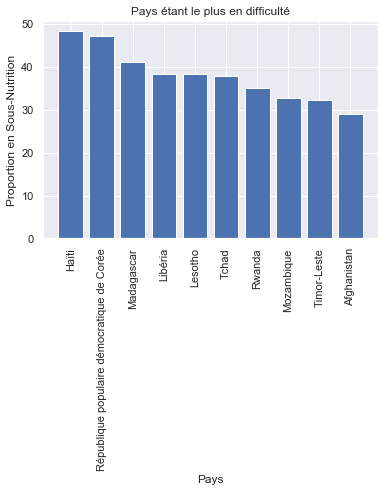

In [41]:
SNPOPD2017 = SNPOP2017.sort_values('Proportion', ascending=False).head(10)
xZ = SNPOPD2017['Pays']
yV = SNPOPD2017['Proportion']
plt.xlabel('Pays')
plt.xticks(rotation='vertical')
plt.ylabel('Proportion en Sous-Nutrition')
plt.title('Pays étant le plus en difficulté')

plt.bar(xZ, yV)
plt.show()

In [42]:
### Extras

In [43]:
dispo_alimentaire.loc[(dispo_alimentaire["Zone"] == "Thaïlande") &\
                                        (dispo_alimentaire["Produit"] == "Manioc")]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,"1,800.00","2,081.00",40.00,13.00,0.05,0.14,"6,264.00","25,214.00","1,250.00",871.00,"1,511.00","30,228.00",nan,0.00,0.00


In [44]:
ProportionExpProd = dispo_alimentaire["Exportations - Quantité"] /dispo_alimentaire["Production"]
print((ProportionExpProd.iloc[[13809]])*100)

13809   83.41
dtype: float64


In [45]:
dispo_alimentaire.loc[(dispo_alimentaire["Produit"] == "Vin") &\
                      (dispo_alimentaire["Disponibilité alimentaire (Kcal/personne/jour)"] > 0)]\
.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
8142,Luxembourg,Vin,vegetale,nan,nan,100.00,51.41,nan,0.01,27.00,5.00,22.00,27.00,nan,10.00,nan,nan,0.00
11260,Portugal,Vin,vegetale,nan,nan,76.00,40.35,nan,0.00,481.00,307.00,160.00,428.00,7.00,608.00,nan,46.00,20.00
4932,France,Vin,vegetale,nan,97.00,71.00,37.78,nan,0.00,"3,326.00","1,532.00",565.00,"2,429.00",16.00,"4,293.00",nan,785.00,0.00
13252,Suisse,Vin,vegetale,nan,0.00,69.00,36.36,nan,0.00,294.00,2.00,187.00,294.00,nan,84.00,nan,nan,25.00
1071,Autriche,Vin,vegetale,nan,nan,60.00,31.71,nan,0.00,278.00,48.00,84.00,269.00,nan,239.00,nan,9.00,3.00
6927,Italie,Vin,vegetale,nan,nan,57.00,30.55,nan,0.00,"2,296.00","2,142.00",255.00,"1,863.00",20.00,"4,504.00",nan,413.00,-322.00
1533,Belgique,Vin,vegetale,nan,nan,54.00,27.49,nan,0.00,305.00,32.00,334.00,305.00,nan,3.00,nan,nan,nan
4114,Danemark,Vin,vegetale,nan,nan,53.00,28.26,nan,0.00,159.00,48.00,206.00,159.00,nan,nan,nan,nan,1.00
12709,Serbie,Vin,vegetale,nan,nan,47.00,25.47,nan,nan,242.00,12.00,24.00,242.00,nan,231.00,nan,nan,0.00
791,Argentine,Vin,vegetale,nan,nan,47.00,25.04,nan,0.00,"1,177.00",322.00,1.00,"1,038.00",139.00,"1,498.00",nan,nan,0.00


In [46]:
PropVinTotal = dispo_alimentaire.loc[(dispo_alimentaire["Produit"] == "Vin") &\
                      (dispo_alimentaire["Disponibilité alimentaire (Kcal/personne/jour)"] > 0),\
                      "Disponibilité alimentaire (Kcal/personne/jour)"].sum()/\
dispo_alimentaire.loc[(dispo_alimentaire["Disponibilité alimentaire (Kcal/personne/jour)"] > 0),\
                      "Disponibilité alimentaire (Kcal/personne/jour)"].sum()
print(round((PropVinTotal)*100,2), "Pourcent de la Disponibilité alimentaire Total")

0.41 Pourcent de la Disponibilité alimentaire Total
